In [0]:
from keras.datasets import mnist
import keras
from keras.models import Model
from keras.layers import Input,Dense,Flatten,Dropout,merge,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
from sklearn.model_selection import train_test_split
from keras.optimizers import Adadelta
from keras.layers import Input, Conv2D, MaxPool2D, UpSampling2D
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt


In [0]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
# to convert values from 0 to 255 into range 0 to 1.
train_X = train_X.astype('float32') / 255
test_X = test_X.astype('float32') / 255
train_X = np.reshape(train_X, (len(train_X), 28, 28, 1)) 
test_X = np.reshape(test_X, (len(test_X), 28, 28, 1))  
    
noise_factor = 0.5
    
#np.random.normal => random means to obtain random samples
#normal means normal or gaussian distribution, 
train_X_noisy = train_X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_X.shape)  
test_X_noisy = test_X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_X.shape) 
    
train_X_noisy = np.clip(train_X_noisy, 0., 1.)   
test_X_noisy = np.clip(test_X_noisy, 0., 1.)

In [0]:
Input_img = Input(shape=(28, 28, 1))  
    
#encoding architecture
x1 = Conv2D(64, (3, 3), activation='relu', padding='same')(Input_img)
x1 = MaxPool2D( (2, 2), padding='same')(x1)
x2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
x2 = MaxPool2D( (2, 2), padding='same')(x2)
x3 = Conv2D(16, (3, 3), activation='relu', padding='same')(x2)
encoded    = MaxPool2D( (2, 2), padding='same')(x3)
    
# decoding architecture
x3 = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x3 = UpSampling2D((2, 2))(x3)
x2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x3)
x2 = UpSampling2D((2, 2))(x2)
x1 = Conv2D(64, (3, 3), activation='relu')(x2)
x1 = UpSampling2D((2, 2))(x1)
decoded   = Conv2D(1, (3, 3), padding='same')(x1)

autoencoder = Model(Input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


In [6]:
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
a_e = autoencoder.fit(train_X_noisy, train_X,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(test_X_noisy, test_X),
                callbacks=[early_stopper])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 17s 285us/step - loss: 0.2437 - val_loss: 0.1989
Epoch 2/100
60000/60000 [==============================] - 11s 175us/step - loss: 0.1979 - val_loss: 0.1792
Epoch 3/100
60000/60000 [==============================] - 11s 176us/step - loss: 0.1802 - val_loss: 0.1744
Epoch 4/100
60000/60000 [==============================] - 11s 175us/step - loss: 0.1683 - val_loss: 0.2321
Epoch 5/100
60000/60000 [==============================] - 11s 175us/step - loss: 0.1619 - val_loss: 0.1502
Epoch 6/100
60000/60000 [==============================] - 11s 176us/step - loss: 0.1574 - val_loss: 0.1718
Epoch 7/100
60000/60000 [==============================] - 11s 176us/step - loss: 0.1532 - val_loss: 0.1453
Epoch 8/100
60000/60000 [==============================] - 11s 175us/step - loss: 0.1496 - val_loss: 0.1484
Epoch 9/100
60000/60000 [==============================] - 11s 175us/step - loss: 0.14

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
autoencoder.save_weights("autoencoder.h5")

In [92]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 7, 7, 16)          4624      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 4, 4, 16)          0   

In [55]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_y)
test_Y_one_hot = to_categorical(test_y)

# Display the change for category label using one-hot encoding
print('Original label:', train_y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 5
After conversion to one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
train_X,valid_X,train_label,valid_label = train_test_split(train_X,train_Y_one_hot,test_size=0.2,random_state=13)

In [57]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [0]:
#encoding architecture
x1 = Conv2D(64, (3, 3), activation='relu', padding='same')(Input_img)
x1 = MaxPool2D( (2, 2), padding='same')(x1)
x2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
x2 = MaxPool2D( (2, 2), padding='same')(x2)
x3 = Conv2D(16, (3, 3), activation='relu', padding='same')(x2)

encoded    = MaxPool2D( (2, 2), padding='same')(x3)

In [0]:
num_classes = 10
flat = Flatten()(encoded)
den = Dense(128, activation='relu')(flat)
out = Dense(num_classes, activation='softmax')(den)

In [0]:
full_model = Model(Input_img,out)

In [0]:
for l1,l2 in zip(full_model.layers[:7],autoencoder.layers[0:7]):
    l1.set_weights(l2.get_weights())

In [43]:
autoencoder.get_weights()[0][1]

array([[[-4.34710979e-02,  4.70502190e-02,  1.43462956e-01,
          2.42470149e-02,  2.42089257e-02, -1.35915251e-02,
         -1.96329644e-03, -7.31643755e-04,  8.68859235e-03,
          6.57479018e-02, -2.79542943e-03, -6.48744851e-02,
         -3.50947082e-02,  4.64640893e-02,  1.60866126e-03,
         -1.45177578e-03, -1.96775589e-02,  8.94371048e-03,
         -4.42390107e-02, -6.10827096e-02,  2.07356773e-02,
          3.59290205e-02,  1.41172362e-02,  3.80311236e-02,
         -3.77272815e-03, -2.84821494e-04,  1.15543529e-02,
          3.82602029e-02, -1.28165865e-03, -6.17672876e-03,
          3.39011736e-02,  1.04272477e-02, -5.30296825e-02,
         -1.68496370e-02, -1.03562046e-02, -1.39333559e-02,
          3.23573835e-02, -1.70096382e-02,  1.66843273e-02,
         -4.00315411e-02, -3.74097638e-02,  2.69266851e-02,
          1.36997988e-02, -7.07356073e-03, -2.97002203e-04,
          4.04621754e-03, -2.35350832e-01, -8.80308449e-03,
         -1.14701139e-02, -2.72792149e-0

In [44]:
full_model.get_weights()[0][1]

array([[[-4.34710979e-02,  4.70502190e-02,  1.43462956e-01,
          2.42470149e-02,  2.42089257e-02, -1.35915251e-02,
         -1.96329644e-03, -7.31643755e-04,  8.68859235e-03,
          6.57479018e-02, -2.79542943e-03, -6.48744851e-02,
         -3.50947082e-02,  4.64640893e-02,  1.60866126e-03,
         -1.45177578e-03, -1.96775589e-02,  8.94371048e-03,
         -4.42390107e-02, -6.10827096e-02,  2.07356773e-02,
          3.59290205e-02,  1.41172362e-02,  3.80311236e-02,
         -3.77272815e-03, -2.84821494e-04,  1.15543529e-02,
          3.82602029e-02, -1.28165865e-03, -6.17672876e-03,
          3.39011736e-02,  1.04272477e-02, -5.30296825e-02,
         -1.68496370e-02, -1.03562046e-02, -1.39333559e-02,
          3.23573835e-02, -1.70096382e-02,  1.66843273e-02,
         -4.00315411e-02, -3.74097638e-02,  2.69266851e-02,
          1.36997988e-02, -7.07356073e-03, -2.97002203e-04,
          4.04621754e-03, -2.35350832e-01, -8.80308449e-03,
         -1.14701139e-02, -2.72792149e-0

In [0]:
for layer in full_model.layers[0:7]:
    layer.trainable = False

In [0]:
full_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [47]:
full_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 16)          4624      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 16)          0   

In [58]:
classify_train = full_model.fit(train_X, train_label, batch_size=64,epochs=100,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 5s 113us/step - loss: 0.6131 - accuracy: 0.8769 - val_loss: 0.2130 - val_accuracy: 0.9444
Epoch 2/100
48000/48000 [==============================] - 5s 107us/step - loss: 0.1737 - accuracy: 0.9521 - val_loss: 0.1509 - val_accuracy: 0.9558
Epoch 3/100
48000/48000 [==============================] - 5s 109us/step - loss: 0.1340 - accuracy: 0.9609 - val_loss: 0.1269 - val_accuracy: 0.9621
Epoch 4/100
48000/48000 [==============================] - 5s 109us/step - loss: 0.1154 - accuracy: 0.9663 - val_loss: 0.1111 - val_accuracy: 0.9676
Epoch 5/100
48000/48000 [==============================] - 5s 112us/step - loss: 0.1039 - accuracy: 0.9696 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 6/100
48000/48000 [==============================] - 6s 115us/step - loss: 0.0953 - accuracy: 0.9714 - val_loss: 0.0946 - val_accuracy: 0.9715
Epoch 7/100
48000/48000 [==============================]

In [0]:
full_model.save_weights('autoencoder_classification.h5')

In [0]:
for layer in full_model.layers[0:7]:
    layer.trainable = True

In [0]:
full_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [62]:
classify_train = full_model.fit(train_X, train_label, batch_size=64,epochs=100,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 9s 179us/step - loss: 0.0407 - accuracy: 0.9880 - val_loss: 0.0784 - val_accuracy: 0.9828
Epoch 2/100
48000/48000 [==============================] - 8s 169us/step - loss: 0.0318 - accuracy: 0.9901 - val_loss: 0.0743 - val_accuracy: 0.9842
Epoch 3/100
48000/48000 [==============================] - 8s 168us/step - loss: 0.0261 - accuracy: 0.9917 - val_loss: 0.0829 - val_accuracy: 0.9829
Epoch 4/100
48000/48000 [==============================] - 8s 168us/step - loss: 0.0221 - accuracy: 0.9930 - val_loss: 0.0930 - val_accuracy: 0.9799
Epoch 5/100
48000/48000 [==============================] - 8s 167us/step - loss: 0.0232 - accuracy: 0.9931 - val_loss: 0.0791 - val_accuracy: 0.9841
Epoch 6/100
48000/48000 [==============================] - 8s 167us/step - loss: 0.0228 - accuracy: 0.9930 - val_loss: 0.1007 - val_accuracy: 0.9808
Epoch 7/100
48000/48000 [==============================]

In [0]:
full_model.save_weights('classification_complete.h5')

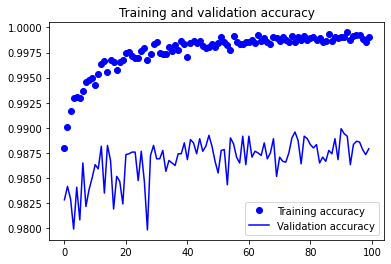

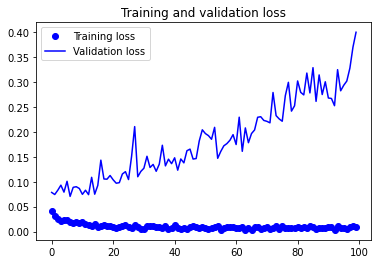

In [67]:
accuracy = classify_train.history['accuracy']
val_accuracy = classify_train.history['val_accuracy']
loss = classify_train.history['loss']
val_loss = classify_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [75]:
predicted_classes = full_model.predict(test_X)
print(predicted_classes)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [81]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=0)
print(predicted_classes)

0


980


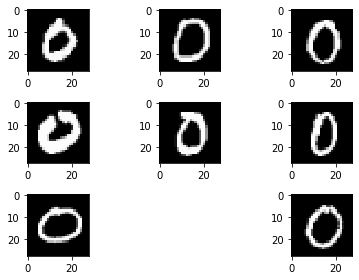

In [88]:
#number of correct prediction and correct predicted image
correct = np.where(predicted_classes==test_y)[0]
print(len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.tight_layout()